# Filtering Spam Email Messages Using Naive Bayes Algorithm

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline


In [53]:
df = pd.read_csv("emails.csv")

In [54]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [55]:
# Looking at the shape of the dataset

df.shape

(5728, 2)

# Data Visualization

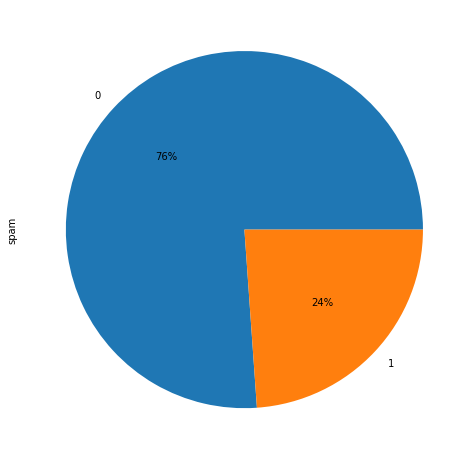

In [56]:
# Creating a pie chart to show the distribution of spam and non-spam email in the dataset

plt.rcParams["figure.figsize"] = [8,10]
df.spam.value_counts().plot(kind="pie",autopct="%1.0f%%")

In [57]:
#Creating a word cloud to show the most frequently occuring words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')


#Removing words such as a, is, you, I, are, etc...

df["text_without_sw"] = df["text"].apply(lambda x: "".join([item for item in x.split() if item not in stop]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gambl_000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


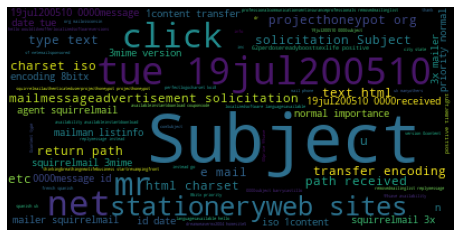

In [58]:
#Creating a wordcloud of spam from the filtered text

df_spam = df[df["spam"]==1]

plt.rcParams["figure.figsize"] = [8,10]
text = "".join(df_spam["text_without_sw"])
wordcloud2 = WordCloud().generate(text)


plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

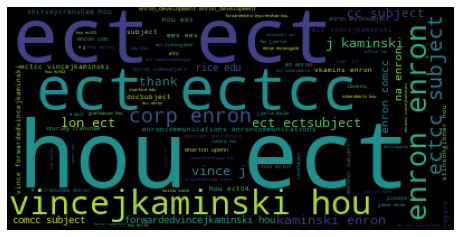

In [59]:
#Creating a wordcloud of non spam from the filtered text

df_spam = df[df["spam"]==0]

plt.rcParams["figure.figsize"] = [8,10]
text = "".join(df_spam["text_without_sw"])
wordcloud2 = WordCloud().generate(text)


plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

# Cleaning the Data

In [60]:
# Before cleaning the data first dividing the data into text feature and spam labels

X = df["text"]

y = df["spam"]


In [61]:
# clean_text function which accepts a text string and returns a string that is cleaned of digits, special characters and 
# multiple empty spaces

def clean_text(doc):
    document = re.sub("[^a-zA-Z]"," ",doc)
    document = re.sub(r"\s+[a-zA-Z]\s+"," ",document)
    document = re.sub(r"\s+"," ",document)
    return document


In [62]:
X_sentences = []

reviews = list(X)
for rev in reviews:
    X_sentences.append(clean_text(rev))


# Convert Text to Numbers

In [63]:
# Converting the email text to numbers

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500,min_df=5,max_df=0.7,stop_words=stopwords.words("english"))
X = vectorizer.fit_transform(X_sentences).toarray()

# Training the Model

In [64]:
# Dividing the data into training and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [65]:
#Training the model
spam_detector = MultinomialNB()
spam_detector.fit(X_train,y_train)

MultinomialNB()

# Evaluating Model Performance

In [66]:
# making predictions using the model

y_pred = spam_detector.predict(X_test)

In [67]:
#Creating a confusion matrix to show the model performance

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

print(accuracy_score(y_test,y_pred))

[[849   7]
 [ 18 272]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       856
           1       0.97      0.94      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

0.9781849912739965


In [68]:
# An accuracy score of 98% is pretty good

# Making Predications on Single Instance

In [69]:
#Making a prediction on a single sentence

print(X_sentences[56])
print(y[56])

Subject localized software all languages available hello we would like to offer localized software versions german french spanish uk and many others aii iisted software is available for immediate downioad no need to wait week for cd deiivery just few exampies norton lnternet security pro windows xp professionai with sp fuil version corei draw graphics suite dreamweaver mx homesite inciudinq macromedia studio mx just browse our site and find any software you need in your native ianguaqe best reqards kayieen 
1


In [71]:
# Passing this sentence into the spam detector

print(spam_detector.predict(vectorizer.transform([X_sentences[56]])))

[1]
